In [0]:
%tensorflow_version 1.x
# !sudo apt-get install texlive-latex-extra texlive-fonts-recommended dvipng

In [0]:
import numpy as np
np.random.seed(456)
import  tensorflow as tf
tf.set_random_seed(456)
from matplotlib import rc
rc('text', usetex=True)
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error

In [0]:
def pearson_r2_score(y, y_pred):
  """Computes Pearson R^2 (square of Pearson correlation)."""
  return pearsonr(y, y_pred)[0] ** 2

def rms_score(y_true, y_pred):
  """Computes RMS error."""
  return np.sqrt(mean_squared_error(y_true, y_pred))

In [0]:
with tf.name_scope('placeholders'):
  x = tf.placeholder(tf.float32, (N, 1))
  y = tf.placeholder(tf.float32, (N,))

In [0]:
# Generate synthetic data
N = 100
w_true = 5
b_true = 2
noise_scale = .1
x_np = np.random.rand(N, 1)
noise = np.random.normal(scale=noise_scale, size=(N, 1))
# Convert shape of y_np to (N,)
y_np = np.reshape(w_true * x_np  + b_true + noise, (-1))

Text(0.5, 1.0, 'Toy Linear Regression Data, $y = 5x + 2 + N(0, 1)$')

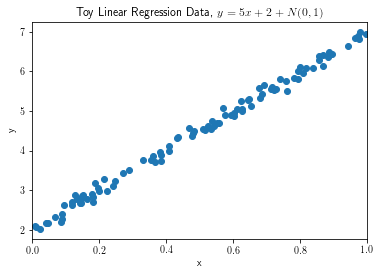

In [12]:
# Save image of the data distribution
plt.scatter(x_np, y_np)
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 1)
plt.title("Toy Linear Regression Data, "
          r"$y = 5x + 2 + N(0, 1)$")
# plt.savefig("lr_data.png")

In [0]:
# Generate tensorflow graph
with tf.name_scope("placeholders"):
  x = tf.placeholder(tf.float32, (N, 1))
  y = tf.placeholder(tf.float32, (N,))
with tf.name_scope("weights"):
  W = tf.Variable(tf.random_normal((1, 1)))
  b = tf.Variable(tf.random_normal((1,)))
with tf.name_scope("prediction"):
  y_pred = tf.matmul(x, W) + b
with tf.name_scope("loss"):
  l = tf.reduce_sum((y - tf.squeeze(y_pred))**2)
with tf.name_scope("optim"):
  train_op = tf.train.AdamOptimizer(.001).minimize(l)

with tf.name_scope("summaries"):
  tf.summary.scalar("loss", l)
  merged = tf.summary.merge_all()

train_writer = tf.summary.FileWriter('/tmp/lr-train', tf.get_default_graph())

In [0]:
n_steps = 8000
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  # Train model
  for i in range(n_steps):
    feed_dict = {x: x_np, y: y_np}
    _, summary, loss = sess.run([train_op, merged, l], feed_dict=feed_dict)
    print("step %d, loss: %f" % (i, loss))
    train_writer.add_summary(summary, i)

  # Get weights
  w_final, b_final = sess.run([W, b])

  # Make Predictions
  y_pred_np = sess.run(y_pred, feed_dict={x: x_np})

In [17]:
y_pred_np = np.reshape(y_pred_np, -1)
r2 = pearson_r2_score(y_np, y_pred_np)
print("Pearson R^2: %f" % r2)
rms = rms_score(y_np, y_pred_np)
print("RMS: %f" % rms)

Pearson R^2: 0.994371
RMS: 0.224905


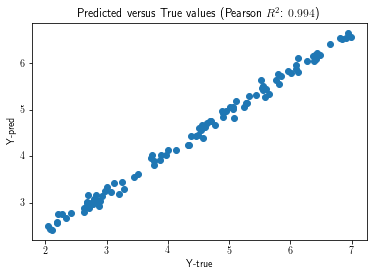

In [19]:
# Clear figure
plt.clf()
plt.xlabel("Y-true")
plt.ylabel("Y-pred")
plt.title("Predicted versus True values "
          r"(Pearson $R^2$: $0.994$)")
plt.scatter(y_np, y_pred_np)
# plt.savefig("lr_pred.png")

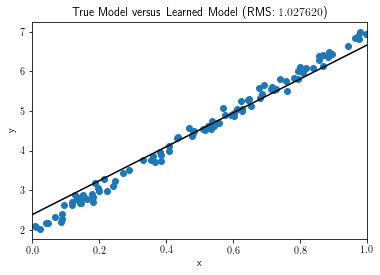

In [20]:
# Now draw with learned regression line
plt.clf()
plt.xlabel("x")
plt.ylabel("y")
plt.title("True Model versus Learned Model "
          r"(RMS: $1.027620$)")
plt.xlim(0, 1)
plt.scatter(x_np, y_np)
x_left = 0
y_left = w_final[0]*x_left + b_final
x_right = 1
y_right = w_final[0]*x_right + b_final
plt.plot([x_left, x_right], [y_left, y_right], color='k')
# plt.savefig("lr_learned.png")